<a href="https://colab.research.google.com/github/Sharon972/codigo_introduccion/blob/CodigosPrueba/PCA_An%C3%A1lisis_de_componentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Componentes Principales (PCA)

## Entendiendo la varianza, la covarianza y la correlación

Uno de los conceptos más recurrentes con el que te encuentras en estadística y aprendizaje automático es la **covarianza**.

Muchos de los métodos de preprocesamiento o análisis predictivo, dependen de este elemento, por ejemplo para reducir dimensiones en los datos, realizar regresiones, detectar valores atípicos multivariados, entre otros. Conocer la covarianza puede proporcionar mucha más información sobre cómo resolver problemas de varias variables.

Para entender mejor este concepto veamos primero lo que significa la **varianza**. Sabemos que la varianza representa la variación de valores en una sola variable y se esribe como sigue:

$$
\sigma^2 = \frac{1}{n-1} \sum_{i}^{n}(x_i - \bar{x})^2
$$

donde $x_i$ representan el conjunto de datos, para $i=1, \dots, n$ y $\bar{x}$ es la media muestral.

Veamos un ejemplo:

In [7]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

La **covarianza** se calcula entre dos variables diferentes y su propósito es calcular cómo estas dos variables varian en conjunto. La covarianza se escribe como sigue:

$$
S_{xy} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

El resultado del cálculo de la covarianza, se puede poner en forma de una matriz somo sigue:

$$
\left[
\begin{array}{cc}
S_{xx} & S_{xy} \\
S_{xy} & S_{yy}
\end{array}\right] =
\left[
\begin{array}{cc}
cov(x,x) & cov(x,y) \\
cov(y,x) & cov(y,y)
\end{array}\right] =
\left[
\begin{array}{cc}
var(x) & cov(x,y) \\
cov(y,x) & var(y)
\end{array}\right] =
\left[
\begin{array}{cc}
\sigma^2_{x} & S_{xy} \\
S_{xy} & \sigma^2_{y}
\end{array}\right]
$$

Esta matriz es simétrica. Además, los términos de la diagonal se transforman en la varianza correspondiente.

La covariance solo nos proporciona información a cerca de la variación y dirección de la relación entre dos variables.

Por otro lado la **correlación** está limitada entre $-1$ y $1$.

## Eigenvalores y eigenvectores de la covarianza

Los eigenvalores y eigenvectores de la matriz de covarianza representan la magnitud de la dispersión en la dirección de las componentes principales. Recordemos que:

$$
A u = \lambda u
$$

donde $A$ es la matriz, $u$ es un eigenvector y $\lambda$ es un eigenvalor.

Podemos por ejemplo, calcular los eigenvectores de las matrices de covarianza de los ejemplos anteriores:

**Recapitulando.**

* Los eigenvalores de la matriz de covarianza representan la magnitud de la dispersión en la dirección de las componentes principales.
* Cuando la covarianza es pequeña, los eigenvalores son muy parecidos a los valores de la varianza.

# Pasos para realizar *PCA*

El Análisis de Componentes Principales (PCA por sus siglas en inglés) es un método para reducir la dimensionalidad de conjuntos de datos de gran tamaño. La idea es **transformar un conjunto de variables amplio en otro más reducido que mantenga la mayor cantidad de información**. El objetivo final es que los algoritmos de aprendizaje de máquina puedan analizar con mayor facilidad estos datos reducidos en dimensionalidad.

## Estandarización.

Existen varios métodos para estandarizar los datos, véase por ejemplo [Cómo estandarizar variables](https://www.kaggle.com/code/manuelmartinrivas/c-mo-estandarizar-variables/notebook) ,  de tal manera que los datos estén en rangos más manejables. El método más usado se basa en lo siguiente:

$$
z = \frac{x - \bar{x}}{\sigma^2_x}
$$

donde $x$ representan los datos, $\bar{x}$ la media y $\sigma^2_x$ la desviación estándar.

Veamos uno de los ejemplos anteriores.

El método `scipy.stats.zscore()` realiza este tipo de estandarizació.

## Eigenvalores de la matriz de covarianza

Ahora calculamos los eigenvalores y eigenvectores de la matriz de covarianza de los datos estandarizados para encontrar las componentes principales.

Calculamos el porcentaje de varianza de cada componente (información que contiene):
$$\text{Porcentaje de varianza} = \frac{\lambda_i}{\sum_{i} \lambda_i}$$

## Vector de características (*Feature vector*)

Con el cálculo anterior podemos decidir si mantenemos o no toda la información. Es posible formar una matriz cuyas columnas sean los eigenvectores que decidamos mantener. Los eigenvectores se ordenan de mayor a menor significancia, con base en su eigenvalor.

Esto nos dirige hacia la reducción de dimensiones, si tenemos originalmente $n$ dimensiones y decidimos solo mantener $p$ de ellas, con $p<n$, entonces reducimos la dimensionalidad en $n-p$ dimensiones.

En nuestro ejemplo, si mantenemos toda la información tendríamos:

## Reducción de la dimensionalidad

Usando el vector de característica podemos hacer una proyección hacia el número de dimensiones reducidas mediante la siguiente operación:

$$
A_r = A_s \cdot f_v
$$

donde $A_s$ es una matriz de datos, cuyas columnas son los datos originales estandarizados; $f_v$ es el vector de características, cuyas columnas son los eigenvectores ordenados de acuerdo con su eigenvalor de mayor a menor; $A_r$ es la matriz de datos reducida, cuyas columnas contienen los datos reducidos.

$A_s$ es una matriz de tamaño $n \times v$, con $n$ el número de muestras y $v$ el número de variables; $f_v$ es una matriz de tamaño $v \times nc$ con $nc$ el número de componentes que deseamos mantener; $A_r$ resultará en una matriz de $n \times nc$, cuya dimensión ha sido reducida.

# Aplicación a un conjunto de datos.


## Función `mi_PCA()`

Primero definimos la función `mi_PCA()` con los pasos necesarios para realizar un PCA.

In [4]:
def mi_PCA(data, feature, comp = 2):
    """
    FUNCIÓN QUE REALIZA UN ANÁLISIS DE COMPONENTES PRINCIPALES.
    En base a los eigenvalores y eigenvectores de la matriz de covarianza
    obtendré la dirección que señala hacia donde existe mucha varianza, por lo
    que me dice por donde está la mayor información.
    Se transforma un conjunto de variables muy alto, por lo que se toma las
    variables más importantes para analizar.
    """
    # Primero se estandariza los datos, lo transforma a otra escala
    sdata = scipy.stats.zscore(data)

    # Matriz de covarianza de los nuevos datos
    covmat = np.cov(sdata.T)

    # Calculo de los eigenvalores 'w' y eigenvectores 'v'
    w, v = np.linalg.eig(covmat)

    # Ordeno los vectores
    # np.argsort() regresa el índice de los elementos
    # de menor a mayor. Usando [::-1] generamos el
    # vector en reversa, de tal manera que tendremos
    # los índices de los eigenvalores de mayor a menor.
    w_index = np.argsort(w)[::-1]

    # Selecciono los componentes principales
    n_cols = w_index[:comp]

    # Selecciono de eigenvalores principales
    w_total = w.sum()
    wv = np.array([round(100*w[i]/w_total,2) for i in n_cols])

    # Selecciono de eigenvectores principales
    fv = v[:, n_cols]

    # Selecciono del nombre de la componente principal
    feat = [feature[i] for i in n_cols]

    # Reducciono de la dimensionalidad
    P = np.dot(sdata, fv)

    return covmat, wv, fv, feat, P

## Obtención del conjunto de datos

Usaremos datos definidos en el módulo `sklearn`. Revisa [Dataset loading utilities](https://scikit-learn.org/stable/datasets.html) para más información.

In [10]:
#Initialization of Variables
grupo   = datasets.load_diabetes()
data    = grupo.data
target  = grupo.target
feature = grupo.feature_names

## Explorando los datos

In [18]:
print(type(grupo), type(data), type(target), type(feature))

<class 'sklearn.utils._bunch.Bunch'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'list'>


In [19]:
print(len(feature))
print(feature)

10
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [20]:
print(data.shape)
data

(442, 10)


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [21]:
print(target.shape)
data

(442,)


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [22]:
print(grupo)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [26]:
print(grupo.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Visualización

In [23]:
feature

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

0) age
1) sex
2) bmi
3) bp
4) s1
5) s2
6) s3
7) s4
8) s5
9) s6
Selecciona una variable1
Selecciona otra variable2


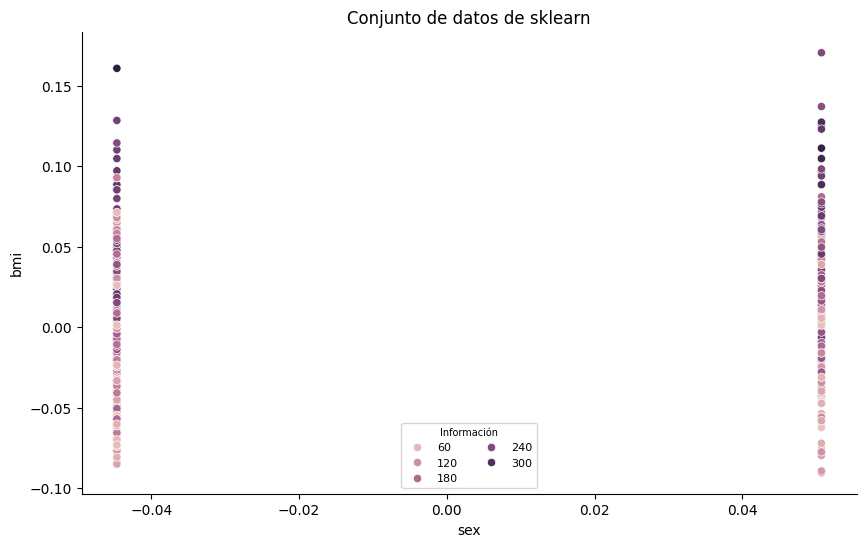

In [25]:
[print('{}) {}'.format(i, feature[i])) for i in range(len(feature))]

v1 = int(input('Selecciona una variable'))
v2 = int(input('Selecciona otra variable'))

fig ,ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title('Conjunto de datos de sklearn')
ax.set_xlabel(feature[v1])
ax.set_ylabel(feature[v2])

sns.scatterplot(
    x = data[:,v1],
    y = data[:,v2],
    hue = target
)

plt.legend(title='Información',
           title_fontsize=7,
           fontsize=8,
           ncol=2,
           frameon=True)

sns.despine()
plt.show()

## PCA usando `mi_PCA()`

Ahora realizamos la reducción de dimensiones usando nuestra función `mi_PCA()`:

In [27]:
covmat, wv, fv, feat, P = mi_PCA(data, feature, 7)

Revisemos cómo está la matriz de covarianza:

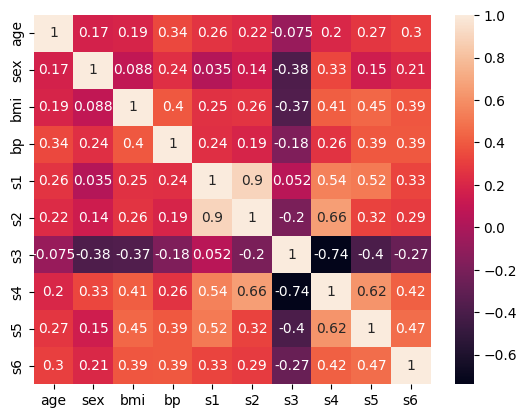

In [28]:
df_covmat = pd.DataFrame(covmat,
                         columns=grupo.feature_names,
                         index = grupo.feature_names)
df_covmat
sns.heatmap(data=df_covmat, annot=True)
plt.show()

Ahora revisamos las componentes principales: eigenvalores y *Feature vector* $f_v$:

In [29]:
wv

array([40.24, 14.92, 12.06,  9.55,  6.62,  6.03,  5.37])

In [30]:
wv.sum()

94.79

In [31]:
feat

['age', 'sex', 'bmi', 'bp', 's3', 's5', 's6']

In [32]:
df_pcomp = pd.DataFrame(np.array([wv]), columns=feat)
df_pcomp

,age,sex,bmi,bp,s3,s5,s6
0,40.24,14.92,12.06,9.55,6.62,6.03,5.37


<Axes: >

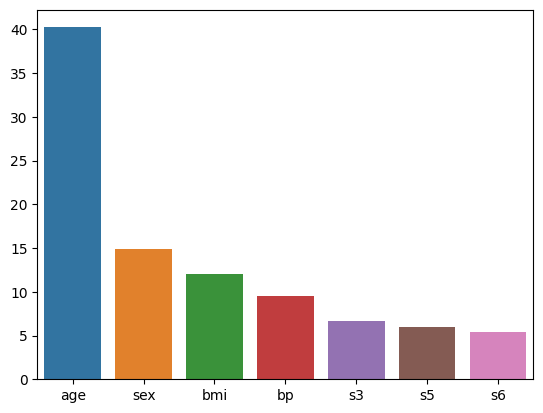

In [33]:
sns.barplot(data=df_pcomp)

In [34]:
fv

array([[-0.2164309 , -0.04436721, -0.49466786,  0.41401222, -0.68687555,
        -0.22581534,  0.10953009],
       [-0.18696688,  0.3865472 ,  0.10686424,  0.67985981,  0.37346404,
         0.04170542,  0.06762221],
       [-0.30316216,  0.15628128, -0.16752691, -0.49982463,  0.12933269,
        -0.40315117,  0.51987438],
       [-0.27173773,  0.138266  , -0.51357084,  0.01966246,  0.48687441,
        -0.27278327, -0.32065478],
       [-0.34325511, -0.57302691,  0.0685791 ,  0.068396  ,  0.12917992,
         0.00539819, -0.07364356],
       [-0.35186068, -0.45594185,  0.26968897,  0.16777391,  0.11672218,
        -0.13326155,  0.2305345 ],
       [ 0.28243681, -0.50623907, -0.38603191,  0.07602044,  0.24500101,
         0.10635402,  0.00754795],
       [-0.4288337 ,  0.06818072,  0.38067992, -0.00792103, -0.14364599,
        -0.03393588, -0.07124407],
       [-0.37861802,  0.026187  , -0.06363011, -0.26442689, -0.15163894,
         0.17873088, -0.64730189],
       [-0.32218296,  0.0849

## Graficamos los datos reducidos

0) age
1) sex
2) bmi
3) bp
4) s3
5) s5
6) s6
Selecciona una variable1
Selecciona otra variable6


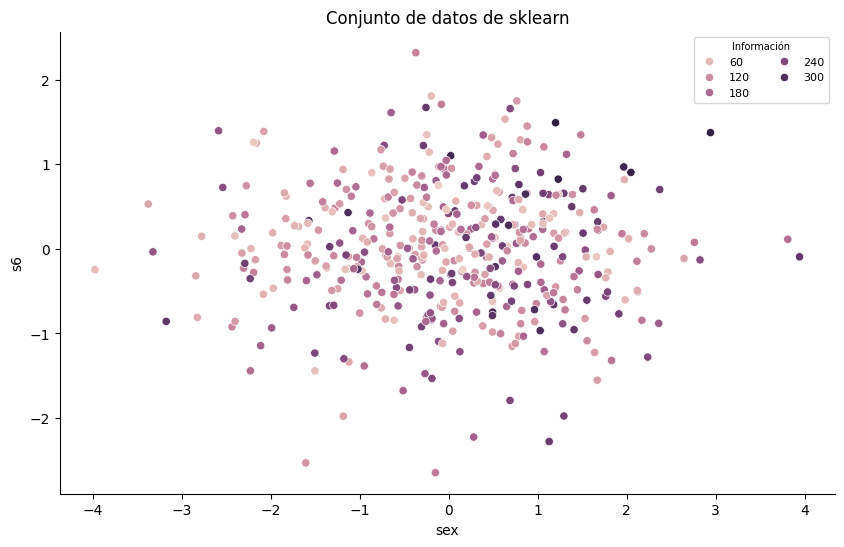

In [35]:
[print('{}) {}'.format(i, feat[i])) for i in range(len(feat))]

v1 = int(input('Selecciona una variable'))
v2 = int(input('Selecciona otra variable'))

fig ,ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title('Conjunto de datos de sklearn')
ax.set_xlabel(feat[v1])
ax.set_ylabel(feat[v2])

sns.scatterplot(
    x = P[:,v1],
    y = P[:,v2],
    hue = target
)

plt.legend(title='Información',
           title_fontsize=7,
           fontsize=8,
           ncol=2,
           frameon=True)

sns.despine()
plt.show()